In [1]:
import os
import sys
sys.path.append('../')
from lib.env.global_var import *
from lib.func.shelve_store import *
sys.path.remove('../')
import statsmodels
import copy

In [2]:
%run -i financial_sector_functions.py

/home/luke/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
%run -i financial_sector_ret_space.py

In [4]:
for csv_name in csv_name_list:
    var_name = csv_name.split(".")[0]
    exec("freq = pd.infer_freq("+var_name+".index)")
    print(var_name,freq)

('CPI', 'QS-OCT')
('GDP', 'QS-OCT')
('DGS10', None)
('HPI', 'MS')
('PAYEMS', 'MS')
('TEDRATE', None)
('FEDFUNDS', 'MS')
('NETEXP', 'QS-OCT')
('PCE', 'MS')
('UNRATE', 'MS')
('CSENT', 'MS')
('OAS', None)
('RECESSION', 'MS')
('VIXCLS', None)


In [5]:
CPI = CPI.diff().dropna()
GDP = (GDP.shift()/GDP-1).dropna()
NETEXP = (NETEXP.shift()/NETEXP -1).dropna()

In [6]:
for csv_name in csv_name_list:
    var_name = csv_name.split(".")[0]
    print(var_name)
    exec(var_name+" = quaterly_to_monthly("+var_name+")")

CPI
GDP
DGS10
HPI
PAYEMS
TEDRATE
FEDFUNDS
NETEXP
PCE
UNRATE
CSENT
OAS
RECESSION
VIXCLS


In [7]:
manual_conversion_list = ['CPI.csv','GDP.csv','NETEXP.csv']
do_not_convert_to_ret = ['UNRATE.csv','RECESSION.csv','OAS.csv','FEDFUNDS.csv']
ret_exemp_list = manual_conversion_list+do_not_convert_to_ret
ret_exemp_list

['CPI.csv',
 'GDP.csv',
 'NETEXP.csv',
 'UNRATE.csv',
 'RECESSION.csv',
 'OAS.csv',
 'FEDFUNDS.csv']

In [8]:
for csv_name in do_not_convert_to_ret:
    var_name = csv_name.split(".")[0]
    exec(var_name+"="+var_name+"/100")

In [9]:
for csv_name in np.setdiff1d(csv_name_list,ret_exemp_list):
    var_name = csv_name.split(".")[0]
    exec(var_name+"=("+var_name+".shift()"+"/"+var_name+"-1).dropna()")


In [10]:
var_list = map(lambda x:x.split(".")[0],csv_name_list)
var_list

['CPI',
 'GDP',
 'DGS10',
 'HPI',
 'PAYEMS',
 'TEDRATE',
 'FEDFUNDS',
 'NETEXP',
 'PCE',
 'UNRATE',
 'CSENT',
 'OAS',
 'RECESSION',
 'VIXCLS']

In [11]:
bldata_name_list

['OIL.xlsx', 'YIELD_SLOPE.xlsx', 'GOLD.xlsx']

In [12]:
econ_x = pd.concat([GDP,DGS10,HPI,PAYEMS,TEDRATE,FEDFUNDS,NETEXP,PCE,UNRATE,CSENT,OAS,RECESSION,
           VIXCLS],1).resample("M").last().dropna()

In [13]:
CPI.index.max(),GDP.index.max(),DGS10.index.max(),HPI.index.max(),PAYEMS.index.max(),TEDRATE.index.max(),FEDFUNDS.index.max(),NETEXP.index.max(),PCE.index.max(),UNRATE.index.max(),CSENT.index.max(),OAS.index.max(),RECESSION.index.max(),VIXCLS.index.max()

(Timestamp('2017-01-31 00:00:00', freq='M'),
 Timestamp('2017-07-31 00:00:00', freq='M'),
 Timestamp('2017-11-30 00:00:00', freq='M'),
 Timestamp('2017-08-31 00:00:00', freq='M'),
 Timestamp('2017-10-31 00:00:00', freq='M'),
 Timestamp('2017-11-30 00:00:00', freq='M'),
 Timestamp('2017-10-31 00:00:00', freq='M'),
 Timestamp('2017-07-31 00:00:00', freq='M'),
 Timestamp('2017-09-30 00:00:00', freq='M'),
 Timestamp('2017-10-31 00:00:00', freq='M'),
 Timestamp('2017-10-31 00:00:00', freq='M'),
 Timestamp('2017-11-30 00:00:00', freq='M'),
 Timestamp('2017-08-31 00:00:00', freq='M'),
 Timestamp('2017-11-30 00:00:00', freq='M'))

In [14]:
bldata_name_list

['OIL.xlsx', 'YIELD_SLOPE.xlsx', 'GOLD.xlsx']

In [15]:
OIL=(OIL.shift()/OIL-1).dropna()
YIELD_SLOPE = YIELD_SLOPE/100
GOLD = (GOLD.shift()/GOLD-1).dropna()

In [16]:
econ_x = pd.concat([econ_x,OIL,YIELD_SLOPE,GOLD],1).resample("M").last().dropna()

In [17]:
OIL.index.max(),YIELD_SLOPE.index.max(),GOLD.index.max()

(Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-11-30 00:00:00'))

# Adding non-econ data

In [18]:
data_description = pd.read_excel(benchmark_dir_str+'financial_sector_data.xlsx',0).T.dropna()
data_description

,0
LUMSTRUU Index,The Bloomberg Barclays US Mortgage Backed Secu...
DXY Curncy,The U.S. Dollar Index(USDX) indicates the gene...
BBDXY Index,The Bloomberg Dollar Spot Index tracks the per...
BXIICSTN Index,For any further information regarding this ind...
LUGCTRUU Index,The Bloomberg Barclays US Government/Credit Bo...


In [19]:
data_description.iloc[4,0]

u'The Bloomberg Barclays US Government/Credit Bond Index is a broad-based flagship benchmark that measures the non-securitized component of the US Aggregate Index. It includes investment grade, US dollar-denominated, fixed-rate Treasuries, government-related and corporate securities.'

In [20]:
fin_sector_df = pd.read_excel(benchmark_dir_str+'financial_sector_data.xlsx',1)
fin_sector_df.index = fin_sector_df.iloc[:,0].values
MBS = fin_sector_df.loc[:,['LUMSTRUU Index']]
USD = fin_sector_df.loc[:,['DXY Curncy']]
# BBUSD = fin_sector_df.loc[:,['BBDXY Index']]
MTWO = fin_sector_df.loc[:,['M2 Index']]
CAPE = fin_sector_df.loc[:,['BXIICSTN Index']]
CREDIT = fin_sector_df.loc[:,['LUGCTRUU Index']]

for var_name in ['MBS','USD','MTWO','CAPE','CREDIT']:
    exec(var_name+"=("+var_name+".shift()/"+var_name+"-1)"+".dropna()")
#     print(var_name+'=pd.DataFrame('+var_name+
#           ",index="+var_name+".index, columns ="+var_name+".columns)")

In [21]:
# MBS: ret
# USD: ret
# MTWO: ret
# CAPE: ret
# CREDIT: ret

In [22]:
MBS.index.max(),USD.index.max(),MTWO.index.max(),CAPE.index.max(),CREDIT.index.max()

(Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-10-31 00:00:00'),
 Timestamp('2014-03-31 00:00:00'),
 Timestamp('2017-11-30 00:00:00'))

In [23]:
fin_x = pd.concat([econ_x,MBS,USD,MTWO,CREDIT],1).resample("M").last().dropna()
fin_x.index.max()

Timestamp('2017-07-31 00:00:00', freq='M')

In [24]:
WORKING_POPULATION = read_csv(sector_dir_str+'WORKING_POPULATION.csv')
WORKING_POPULATION = WORKING_POPULATION.resample("M").last().dropna()

In [25]:
sector_csv_list = ['ASSET_INTEREST.csv','INSURED_CLAIMS.csv','JOB_FINANCE.csv','LOAN_COMM_INDUS.csv'
                   ,'LOANCONSUM.csv']
for sector_csv in sector_csv_list:
    temp = read_csv(sector_dir_str+sector_csv)
    temp = pd.DataFrame(temp,index = temp.index,columns = temp.columns)
    temp = quaterly_to_monthly(temp).dropna()
    exec(sector_csv.split(".")[0]+"=temp")
#     print(temp.index.min())

In [26]:
WORKING_POPULATION,INSURED_CLAIMS=model_data(WORKING_POPULATION,INSURED_CLAIMS)

In [27]:
ASSET_INTEREST = (ASSET_INTEREST.shift()/ASSET_INTEREST-1).dropna()
INSURED_CLAIMS = INSURED_CLAIMS/WORKING_POPULATION.values
JOB_FINANCE = JOB_FINANCE/100
LOAN_COMM_INDUS = (LOAN_COMM_INDUS.shift()/LOAN_COMM_INDUS-1).dropna()

In [28]:
print(
ASSET_INTEREST.index.min(),INSURED_CLAIMS.index.min(),JOB_FINANCE.index.min(),LOAN_COMM_INDUS.index.min())
ASSET_INTEREST.index.max(),INSURED_CLAIMS.index.max(),JOB_FINANCE.index.max(),LOAN_COMM_INDUS.index.max()

(Timestamp('1985-02-28 00:00:00', freq='M'), Timestamp('1999-01-31 00:00:00', freq='M'), Timestamp('2000-12-31 00:00:00', freq='M'), Timestamp('1985-02-28 00:00:00', freq='M'))


(Timestamp('2017-07-31 00:00:00', freq='M'),
 Timestamp('2017-10-31 00:00:00', freq='M'),
 Timestamp('2017-09-30 00:00:00', freq='M'),
 Timestamp('2017-07-31 00:00:00', freq='M'))

In [29]:
fin_x_all = pd.concat([fin_x,ASSET_INTEREST,INSURED_CLAIMS,JOB_FINANCE,LOAN_COMM_INDUS],1).resample("M").last().dropna()

In [30]:
# ASSET_INTEREST(dollars): ret
# INSURED_CLAIMS(Millions): percentage -> divide by number of people
# JOB_FINANCE(percentage): divide by 100
# LOAN_COMM_INDUS(dollars): ret

In [31]:
x,y=model_data(fin_x_all,sector_beat_spx)

In [32]:
x.tail()

,GDP,DGS10,CSUSHPINSA,PAYEMS,TEDRATE,FEDFUNDS,NETEXP,PCE,UNRATE,UMCSENT,...,YIELD_SLOPE,XAU Curncy,LUMSTRUU Index,DXY Curncy,M2 Index,LUGCTRUU Index,TAIEALLGCLCRT100EP,CCSA,JTU5200JOR,ACILOB
2017-03-31,-0.007984,-0.016667,-0.008029,-0.000343,0.325000,0.0079,-0.031782,-0.004887,0.045,-0.006192,...,0.011334,-0.000608,-0.000284,0.007673,-0.006179,0.000890,0.000000,0.009854,0.037,0.000000
2017-04-30,-0.009990,0.048035,-0.010644,-0.001418,0.052632,0.0090,0.027516,-0.003162,0.044,-0.001031,...,0.010183,-0.015044,-0.006481,0.013125,-0.003888,-0.008171,-0.038510,0.009635,0.051,-0.020599
2017-05-31,-0.009990,0.036199,-0.010895,-0.000992,0.520000,0.0091,0.027516,-0.002149,0.043,-0.001030,...,0.009210,-0.000504,-0.006170,0.021956,-0.004809,-0.008250,0.000000,0.009336,0.038,0.000000
2017-06-30,-0.009990,-0.043290,-0.009031,-0.001435,-0.137931,0.0104,0.027516,-0.001410,0.044,0.021030,...,0.009220,0.021996,0.004035,0.013532,-0.001934,-0.000276,0.000000,0.009470,0.043,0.000000
2017-07-31,-0.012591,0.004348,-0.006958,-0.000942,0.115385,0.0115,0.066861,-0.003633,0.043,0.018201,...,0.009451,-0.021923,-0.004500,0.029775,-0.005609,-0.004163,-0.026086,0.009540,0.044,-0.007913


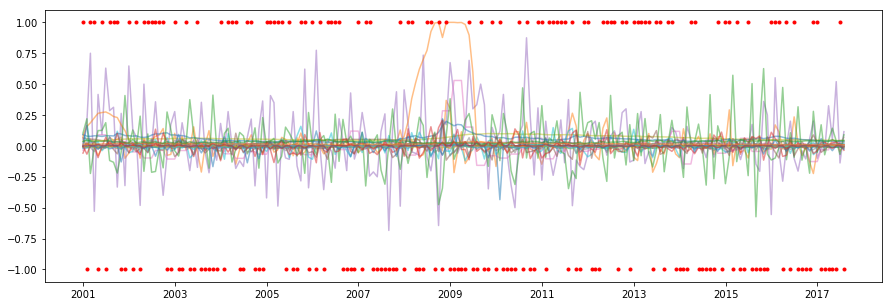

In [38]:
plt.figure(figsize = (15,5))
plt.plot(x,alpha=0.5)
plt.plot(2*(y-0.5),'r.')
plt.show()

In [59]:
# fin_x.to_csv('~/fin_x.csv')

In [60]:
# y.to_csv('~/y.csv')

In [65]:
logistic  = LogisticRegression(penalty='l1', C = 1/(0.01))
logistic.fit(x,y)

coef_df = pd.DataFrame(logistic.coef_,columns=x.columns)
predict_df = pd.DataFrame(logistic.predict(x),index=x.index)
predict_prob_df = pd.DataFrame(logistic.predict_proba(x),index = x.index).iloc[:,[1]]

In [66]:
coef_df

,GDP,DGS10,CSUSHPINSA,PAYEMS,TEDRATE,FEDFUNDS,NETEXP,PCE,UNRATE,UMCSENT,...,YIELD_SLOPE,XAU Curncy,LUMSTRUU Index,DXY Curncy,M2 Index,LUGCTRUU Index,TAIEALLGCLCRT100EP,CCSA,JTU5200JOR,ACILOB
0,31.844847,6.971525,-64.72662,0.0,-0.066411,22.387467,-4.207905,-0.544013,38.264801,0.0,...,0.0,-1.549748,0.0,-0.649807,0.0,19.738302,-5.205229,-77.414581,0.0,-27.173515


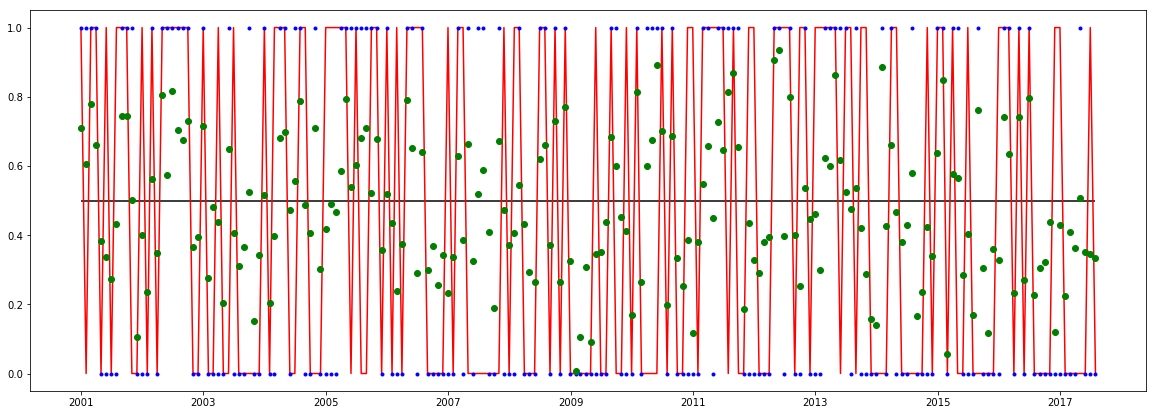

In [67]:
plt.figure(figsize=(20,7))
plt.plot(y,'r-')
plt.plot(predict_df,'b.')
plt.plot(predict_prob_df,'go')
plt.hlines(0.5,x.index.min(),x.index.max())
plt.show()

In [68]:
evaluate_metric(y,predict_df,'acf')

0.68500000000000005

# Dropping some data

In [69]:
coef_is_zero = pd.DataFrame(np.prod(coef_df,0)).T
# coef_is_zero[coef_is_zero.values == 0]
zero_coef_ticker_list =[]
for ticker in coef_is_zero.columns:
    if coef_is_zero.loc[0,ticker]==0:
        zero_coef_ticker_list.append(ticker)
        
assert(len(zero_coef_ticker_list)<len(coef_df.columns))
print(len(zero_coef_ticker_list),len(coef_df.columns))
print(zero_coef_ticker_list)

(6, 24)
['PAYEMS', 'UMCSENT', u'YIELD_SLOPE', 'LUMSTRUU Index', 'M2 Index', 'JTU5200JOR']


In [70]:
fin_x_2 = copy.deepcopy(x)
for ticker in zero_coef_ticker_list:
    fin_x_2 = fin_x_2.drop(ticker,1)
fin_x_2.columns

Index([               u'GDP',              u'DGS10',         u'CSUSHPINSA',
                  u'TEDRATE',           u'FEDFUNDS',             u'NETEXP',
                      u'PCE',             u'UNRATE',       u'BAMLH0A0HYM2',
            u'RECPROUSM156N',             u'VIXCLS',          u'XOI Index',
               u'XAU Curncy',         u'DXY Curncy',     u'LUGCTRUU Index',
       u'TAIEALLGCLCRT100EP',               u'CCSA',             u'ACILOB'],
      dtype='object')

In [71]:
lambda_list = [0.001,0.01,0.1,1.0,10.0]
coef_df_all = pd.DataFrame()
for C in map(lambda x: 1/x,lambda_list):
    logistic  = LogisticRegression(penalty='l2', C = C)
    logistic.fit(fin_x_2,y)

    coef_df_x_2 = pd.DataFrame(logistic.coef_,columns=fin_x_2.columns)
    predict_df_x_2 = pd.DataFrame(logistic.predict(fin_x_2),index=fin_x_2.index)
    predict_prob_df_x_2 = pd.DataFrame(logistic.predict_proba(fin_x_2),index = fin_x_2.index).iloc[:,[1]]
    print(1/C,evaluate_metric(y,predict_df_x_2,'acf'))

(0.001, 0.69499999999999995)
(0.01, 0.69499999999999995)
(0.1, 0.67000000000000004)
(1.0, 0.66500000000000004)
(10.0, 0.54000000000000004)


# Try l2 with lambda

In [73]:
lambda_list = [0.001,0.01,0.1,1.0,10.0]
coef_df_all = pd.DataFrame()
for C in map(lambda x: 1/x,lambda_list):
    logistic  = LogisticRegression(penalty='l2', C = C)
    logistic.fit(x,y)

    coef_df = pd.DataFrame(logistic.coef_,columns=x.columns)
    predict_df = pd.DataFrame(logistic.predict(x),index=x.index)
    predict_prob_df = pd.DataFrame(logistic.predict_proba(x),index = x.index).iloc[:,[1]]
    print(1/C,evaluate_metric(y,predict_df,'acf'))

(0.001, 0.69999999999999996)
(0.01, 0.68000000000000005)
(0.1, 0.67000000000000004)
(1.0, 0.65500000000000003)
(10.0, 0.54000000000000004)


In [50]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=4)
pca_fin_x = pd.DataFrame(pca.fit_transform(fin_x_3),index=fin_x.index)
np.sum(pca.explained_variance_ratio_),pca.explained_variance_ratio_

(0.97607850133156471,
 array([ 0.4969759 ,  0.21005769,  0.17827818,  0.09076673]))

In [52]:
pca_scaled_fin = pd.DataFrame(preprocessing.scale(pca_fin_x),index= pca_fin_x.index)

In [65]:
JOB_FINANCE,y=model_data(JOB_FINANCE,y)
JOB_FINANCE.head()

,JTU5200JOR
2000-12-31,0.133431
2001-01-31,2.129957
2001-02-28,0.757346
2001-03-31,0.258214
2001-04-30,0.632563


In [67]:
metric_list,coef_df = KF_logistic_eval(JOB_FINANCE
    ,y,n = 3,penalty ='l2',C = 1/(10.0),evaluation_metric = 'r2')
coef_df

,JTU5200JOR
0,0.135835
1,-0.093077
2,-0.028389


In [68]:
metric_list

[-1.2321428571428568, -1.1083333333333338, -0.92500000000000049]